# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length (cm), petal width (cm)
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X = X, y = y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    decision_tree = tree_clf,
    out_file = 'iris_tree.dot',
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

In [4]:
! dot -Tpng iris_tree.dot -o iris_tree.png

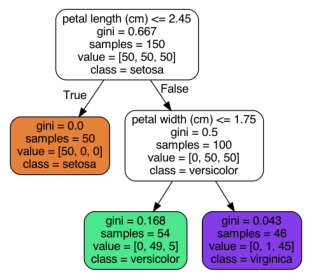

In [5]:
import matplotlib.image as mpimg

image = mpimg.imread('iris_tree.png')
fig, axes = plt.subplots()
axes.imshow(image)
axes.axis('off')
fig.tight_layout()
plt.show()

In [6]:
! rm iris_tree.dot
! rm iris_tree.png

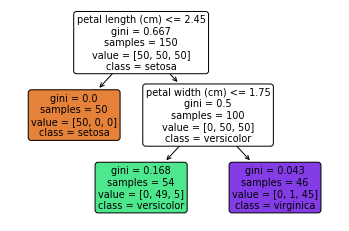

In [7]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots()
plot_tree(decision_tree = tree_clf,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names,
          rounded = True,
          filled = True)
plt.show()

# Making Predictions

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(axes, clf, X, y, limits = [0, 7.5, 0, 3], iris = True, legend = False, plot_training = True):
    x1s = np.linspace(limits[0], limits[1], 100)
    x2s = np.linspace(limits[2], limits[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    axes.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
    if not iris:
        custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        axes.contour(x1, x2, y_pred, alpha = 0.8, cmap = custom_cmap)
    if plot_training:
        axes.scatter(X[y == 0, 0], X[y == 0, 1], color = 'orange', marker = 'o', label = 'Iris-Setosa')
        axes.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
        axes.scatter(X[y == 2, 0], X[y == 2, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
        axes.axis(limits)
    if iris:
        axes.set_xlabel('Petal Length [cm]')
        axes.set_ylabel('Petal Width [cm]')
    else:
        axes.set_xlabel('$x_{1}$')
        axes.set_ylabel('$x_{2}$', rotation = 0)
    if legend:
        axes.legend()

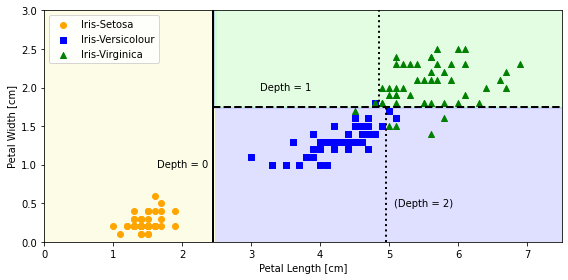

In [9]:
fig, axes = plt.subplots(figsize = (8, 4))
plot_decision_boundary(axes = axes, clf = tree_clf, X = X, y = y, legend = True)

# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
axes.vlines(x = tree_clf.tree_.threshold[0], ymin = axes.get_ylim()[0], ymax = axes.get_ylim()[1], color = 'black', linestyle = 'solid', linewidth = 2)
axes.hlines(y = tree_clf.tree_.threshold[2], xmin = tree_clf.tree_.threshold[0], xmax = axes.get_xlim()[1], color = 'black', linestyle = 'dashed', linewidth = 2)
axes.vlines(x = 4.95, ymin = axes.get_ylim()[0], ymax = tree_clf.tree_.threshold[2], color = 'black', linestyle = 'dotted', linewidth = 2)
axes.vlines(x = 4.85, ymin = tree_clf.tree_.threshold[2], ymax = axes.get_ylim()[1], color = 'black', linestyle = 'dotted', linewidth = 2)
axes.text(x = 2.0, y = 1.0, s = 'Depth = 0', horizontalalignment = 'center', verticalalignment = 'center')
axes.text(x = 3.5, y = 2.0, s = 'Depth = 1', horizontalalignment = 'center', verticalalignment = 'center')
axes.text(x = 5.5, y = 0.5, s = '(Depth = 2)', horizontalalignment = 'center', verticalalignment = 'center')
fig.tight_layout()
plt.show()

# Estimating Class Probabilities

In [10]:
instance = [5, 1.5]
print(tree_clf.predict_proba([instance]))
print(tree_clf.predict([instance]))

[[0.         0.90740741 0.09259259]]
[1]


In [11]:
instances = [
    [1.0, 1.5],
    [1.0, 2.0],
    [2.0, 1.5],
    [4.0, 0.5],
    [7.0, 1.0],
    [4.0, 2.5],
    [7.0, 2.5]
]

for instance in instances:
    print(tree_clf.predict_proba([instance]),
          tree_clf.predict([instance]))

[[1. 0. 0.]] [0]
[[1. 0. 0.]] [0]
[[1. 0. 0.]] [0]
[[0.         0.90740741 0.09259259]] [1]
[[0.         0.90740741 0.09259259]] [1]
[[0.         0.02173913 0.97826087]] [2]
[[0.         0.02173913 0.97826087]] [2]


# Regularization Hyperparameters

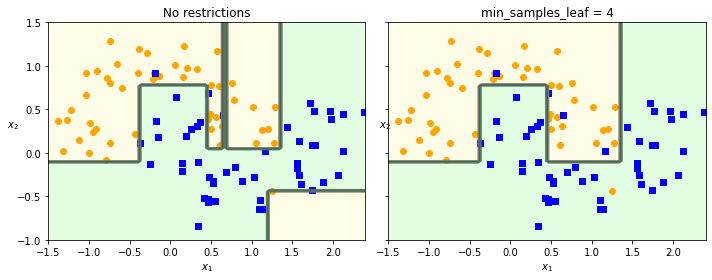

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 53)

deep_tree_clf1 = DecisionTreeClassifier(random_state = 42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 42)
deep_tree_clf1.fit(X = Xm, y = ym)
deep_tree_clf2.fit(X = Xm, y = ym)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), sharey = True)
plot_decision_boundary(axes[0], deep_tree_clf1, Xm, ym, limits = [-1.5, 2.4, -1, 1.5], iris = False)
axes[0].set_title('No restrictions')
plot_decision_boundary(axes[1], deep_tree_clf2, Xm, ym, limits = [-1.5, 2.4, -1, 1.5], iris = False)
axes[1].set_title(f'min_samples_leaf = {deep_tree_clf2.min_samples_leaf}')

fig.tight_layout()
plt.show()

# Regression

In [13]:
# Quadratic training set plus noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5)**2
y = y + np.random.rand(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X = X, y = y)

DecisionTreeRegressor(max_depth=2, random_state=42)

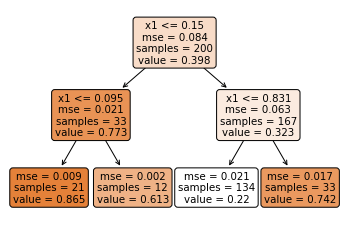

In [15]:
fig, axes = plt.subplots()
plot_tree(decision_tree = tree_reg,
          feature_names = ['x1'],
          rounded = True,
          filled = True)
plt.show()

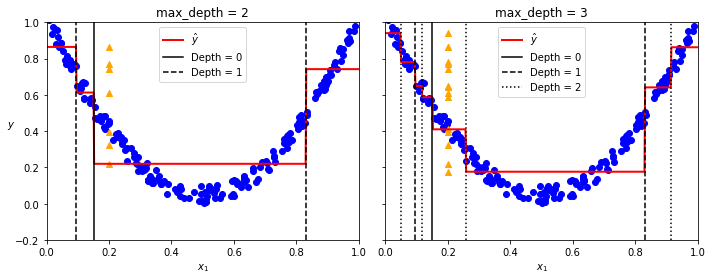

In [16]:
def plot_regression_predictions(axes, tree_reg, X, y, limits = [0, 1, -0.2, 1], ylabel = '$y$'):
    x1 = np.linspace(limits[0], limits[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(X = x1)
    axes.axis(limits)
    axes.set_xlabel('$x_{1}$')
    if ylabel:
        axes.set_ylabel(ylabel, rotation = 0)
    axes.scatter(x = X, y = y, color = 'blue')
    axes.plot(x1, y_pred, color = 'red', linewidth = 2, label = '$\hat{y}$')

tree_reg1 = DecisionTreeRegressor(random_state = 42, max_depth = 2)
tree_reg2 = DecisionTreeRegressor(random_state = 42, max_depth = 3)
tree_reg1.fit(X = X, y = y)
tree_reg2.fit(X = X, y = y)

fig, axes = plt.subplots(figsize = (10, 4), nrows = 1, ncols = 2, sharey = True)

plot_regression_predictions(axes[0], tree_reg1, X, y)
axes[0].axvline(x = tree_reg1.tree_.threshold[0], color = 'black', linestyle = 'solid', label = 'Depth = 0')
axes[0].axvline(x = tree_reg1.tree_.threshold[1], color = 'black', linestyle = 'dashed', label = 'Depth = 1')
axes[0].axvline(x = tree_reg1.tree_.threshold[4], color = 'black', linestyle = 'dashed')
axes[0].set_title(f'max_depth = {tree_reg1.max_depth}')
axes[0].legend()
for value in tree_reg1.tree_.value:
    axes[0].scatter(x = 0.2, y = value, color = 'orange', marker = '^')

plot_regression_predictions(axes[1], tree_reg2, X, y, ylabel = False)
axes[1].axvline(x = tree_reg2.tree_.threshold[0], color = 'black', linestyle = 'solid', label = 'Depth = 0')
axes[1].axvline(x = tree_reg2.tree_.threshold[1], color = 'black', linestyle = 'dashed', label = 'Depth = 1')
axes[1].axvline(x = tree_reg2.tree_.threshold[2], color = 'black', linestyle = 'dotted', label = 'Depth = 2')
axes[1].axvline(x = tree_reg2.tree_.threshold[5], color = 'black', linestyle = 'dotted')
axes[1].axvline(x = tree_reg2.tree_.threshold[8], color = 'black', linestyle = 'dashed')
axes[1].axvline(x = tree_reg2.tree_.threshold[9], color = 'black', linestyle = 'dotted')
axes[1].axvline(x = tree_reg2.tree_.threshold[12], color = 'black', linestyle = 'dotted')
axes[1].set_title(f'max_depth = {tree_reg2.max_depth}')
axes[1].legend()
for value in tree_reg2.tree_.value:
    axes[1].scatter(x = 0.2, y = value, color = 'orange', marker = '^')

fig.tight_layout()
plt.show()

In [17]:
# Discussion on page 186 of the text book
# Manually reproduce values in decision tree diagram
condition = (X > tree_reg1.tree_.threshold[0]) & (X <= tree_reg1.tree_.threshold[4])
X_values = X[condition]
y_values = y[condition]
y_values_pred = tree_reg.predict(X_values.reshape(-1, 1))

print('samples =', len(y_values))

print('value =', np.average(y_values))
print(tree_reg1.tree_.value[5])

# MSE, not RMSE
print('mse =', sum(np.power(pred - true, 2) / len(y_values) for pred, true in zip(y_values_pred, y_values)))
print(tree_reg1.tree_.impurity[5])

samples = 134
value = 0.22015219011232634
[[0.22015219]]
mse = 0.021062972855916358
0.021062972855916372


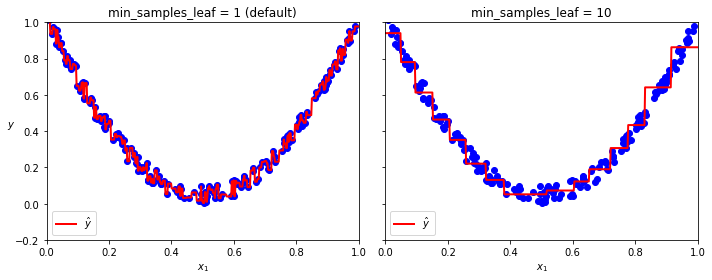

In [18]:
tree_reg1 = DecisionTreeRegressor(random_state = 42)
tree_reg2 = DecisionTreeRegressor(random_state = 42, min_samples_leaf = 10)
tree_reg1.fit(X = X, y = y)
tree_reg2.fit(X = X, y = y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(figsize = (10, 4), nrows = 1, ncols = 2, sharey = True)

axes[0].set_title(f'min_samples_leaf = {tree_reg1.min_samples_leaf} (default)')
plot_regression_predictions(axes[0], tree_reg1, X, y, limits = [0, 1, -0.2, 1])
axes[0].legend()

axes[1].set_title(f'min_samples_leaf = {tree_reg2.min_samples_leaf}')
plot_regression_predictions(axes[1], tree_reg2, X, y, limits = [0, 1, -0.2, 1], ylabel = False)
axes[1].legend()

fig.tight_layout()
plt.show()

# Instability

In [19]:
iris = load_iris()
X = iris.data[:, 2:] # petal length (cm), petal width (cm)
y = iris.target

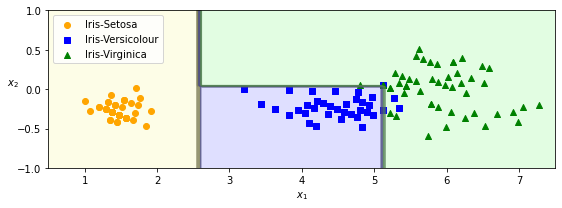

In [20]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state = 42)
tree_clf_r.fit(X = Xr, y = y)

fig, axes = plt.subplots(figsize = (8, 3))
plot_decision_boundary(axes, tree_clf_r, Xr, y, limits = [0.5, 7.5, -1, 1], iris = False, legend = True) # iris = False, otherwise the labels axes labels would be incorrect (wouldn't refer to rotated values)
fig.tight_layout()
plt.show()

In [21]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 40)
tree_clf_tweaked.fit(X = X, y = y)

DecisionTreeClassifier(max_depth=2, random_state=40)

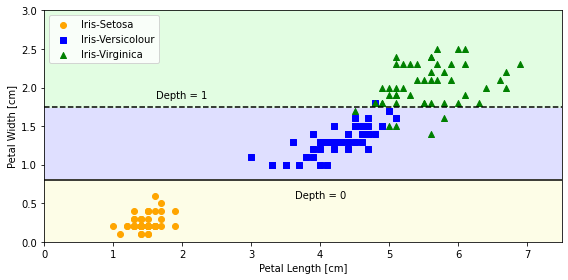

In [22]:
fig, axes = plt.subplots(figsize = (8, 4))
plot_decision_boundary(axes, tree_clf_tweaked, X, y, legend = True)
axes.axhline(tree_clf_tweaked.tree_.threshold[0], color = 'black', linestyle = 'solid')
axes.axhline(tree_clf_tweaked.tree_.threshold[2], color = 'black', linestyle = 'dashed')
axes.text(x = 4, y = 0.6, s = 'Depth = 0', horizontalalignment = 'center', verticalalignment = 'center')
axes.text(x = 2, y = 1.9, s = 'Depth = 1', horizontalalignment = 'center', verticalalignment = 'center')
fig.tight_layout()
plt.show()

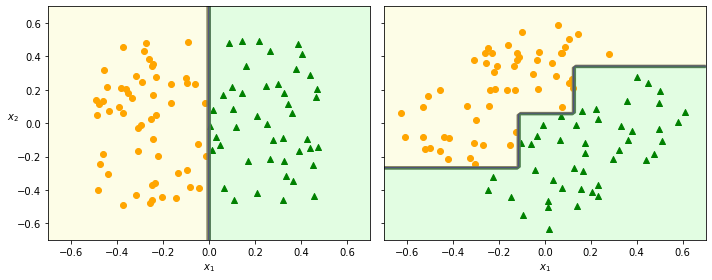

In [23]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state = 42)
tree_clf_s.fit(X = Xs, y = ys)
tree_clf_sr = DecisionTreeClassifier(random_state = 42)
tree_clf_sr.fit(X = Xsr, y = ys)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), sharey = True)
plot_decision_boundary(axes[0], tree_clf_s, Xs, ys, limits = [-0.7, 0.7, -0.7, 0.7], iris = False)
plot_decision_boundary(axes[1], tree_clf_sr, Xsr, ys, limits = [-0.7, 0.7, -0.7, 0.7], iris = False)

axes[1].set_ylabel('')
fig.tight_layout()
plt.show()

# Exercise 1

Page 183 discusses the computational complexity.
Without restrictions, there will be one leaf per training instance and a depth as calculated in the next cell.

In [24]:
number_of_instances = 1e6
depth_level = np.log2(number_of_instances)
print(round(depth_level))

20


Check with the iris dataset

In [25]:
print(np.log2(len(iris.data)))
print(DecisionTreeClassifier(random_state = 42).fit(X = iris.data[:, 2:], y = iris.target).tree_.max_depth)

7.22881869049588
5


# Exercise 2

Generally lower.

Consider a node with the one-dimensional dataset: A, B, A, A, A.
The Gini impurity is 1 - (4/5)^2 - (1/5)^2 = 0.32.
This node will be divided by the CART algorithm into A, B and A, A, A.
The first node will have impurity 1 - (1/2)^2 - (1/2)^2 = 0.5, which is higher than the parent node's impurity.
This is compensated by the second node having impurity 1 - (3/3)^2 - (0/3)^2 = 0.
The overall weighted Gini impurity (Equation 6-2) is (2/5) * (0.5) + (3/5) * 0 = 0.2, which is lower than the parent node's impurity.

# Exercise 3

Page 184: "Reducing max_depth will regularize the model and thus reduce the risk of overfitting."

# Exercise 4

Page 179: "One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don't require feature scaling or centering at all."

# Exercise 5

Page 183 discusses the computational complexity.
m is the number of instances, and n is the number of features.

time_new / time_old = (n_new * m_new * log(m_new)) / (n_old * m_old * log(m_old))

n is the same, but m is different, leading to

time_new = time_old * (m_new * log(m_new)) / (m_old * log(m_old)) = (1 hour) * (10e6 * log(10e6)) / (1e6 * log(1e6)) = (1 hour) * 11.7 = 11.7 hours.

# Exercise 6

Page 183: "For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort = True), but this slows down training considerably for larger training sets."

If the training set contains 100,000 instances (greater than "a few thousand" mentioned above), then setting presort = True will slow down the training.

# Exercise 7

In [26]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

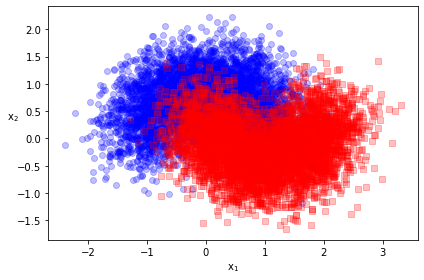

In [27]:
fig, axes = plt.subplots()
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'blue', marker = 'o', alpha = 0.25)
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'red', marker = 's', alpha = 0.25)
axes.set_xlabel('x$_{1}$')
axes.set_ylabel('x$_{2}$', rotation = 0)
fig.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), param_grid = param_grid, cv = 3, verbose = 1)

grid_search_cv.fit(X = X_train, y = y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [30]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)
{'max_leaf_nodes': 17, 'min_samples_split': 2}
0.8555001986342105


By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again.
That is, we don't need to take the best estimator from the previous cell and train it with the training set.
We can simply evaluate the model's accuracy on the test set:

In [31]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X = X_test)
print(accuracy_score(y_true = y_test, y_pred = y_pred))

print(sum(true == pred for true, pred in zip(y_test, y_pred)) / len(y_test))

0.8695
0.8695


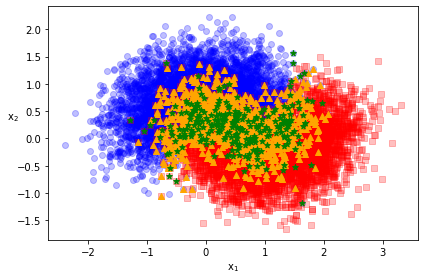

In [32]:
fig, axes = plt.subplots()
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'blue', marker = 'o', alpha = 0.25)
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'red', marker = 's', alpha = 0.25)

# Plot where the classification *failed* for the training and test sets
y_pred = grid_search_cv.predict(X = X_train)
axes.scatter(x = X_train[y_train != y_pred, 0], y = X_train[y_train != y_pred, 1], color = 'orange', marker = '^')
y_pred = grid_search_cv.predict(X = X_test)
axes.scatter(x = X_test[y_test != y_pred, 0], y = X_test[y_test != y_pred, 1], color = 'green', marker = '*')

axes.set_xlabel('x$_{1}$')
axes.set_ylabel('x$_{2}$', rotation = 0)
fig.tight_layout()
plt.show()

Unsurprisingly, the classification fails mainly near the border of the two moons.

# Exercise 8

In [33]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

#rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state = 42)
rs = ShuffleSplit(n_splits = n_trees, train_size = n_instances, random_state = 42)
for mini_train_index, mini_test_index in rs.split(X = X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [34]:
accuracy_scores = []

for mini_set in mini_sets:
    tree_clf = DecisionTreeClassifier(**grid_search_cv.best_params_)
    tree_clf.fit(X = mini_set[0], y = mini_set[1])
    y_pred = tree_clf.predict(X = X_test)
    accuracy_scores.append(accuracy_score(y_true = y_test, y_pred = y_pred))
    
print(np.average(accuracy_scores))
print(np.mean(accuracy_scores))

0.80542
0.80542


In [35]:
# Need to be able to refer to the trained decision trees in later cells, so using the author's method
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X = X_mini_train, y = y_mini_train)
    y_pred = tree.predict(X = X_test)
    accuracy_scores.append(accuracy_score(y_true = y_test, y_pred = y_pred))
    
print(np.average(accuracy_scores))
print(np.mean(accuracy_scores))

0.8054499999999999
0.8054499999999999


In [36]:
from scipy.stats import mode

majority_vote_predictions = []

# A little slow
for instance in X_test:
    predictions = [tree.predict(X = [instance]) for tree in forest]
    majority_vote_predictions.append(mode(predictions))

In [37]:
majority_vote_predictions = [mode_prediction.mode[0][0] for mode_prediction in majority_vote_predictions]
print(accuracy_score(y_true = y_test, y_pred = majority_vote_predictions))

0.872


In [38]:
# Faster
predictions = [tree.predict(X = X_test) for tree in forest]
y_pred_majority_votes, n_votes = mode(predictions)
print(accuracy_score(y_true = y_test, y_pred = y_pred_majority_votes[0]))

0.872


In [39]:
# Author's method

Y_pred = np.empty([n_trees, len(X_test)], dtype = np.uint8)

for index, tree in enumerate(forest):
    Y_pred[index] = tree.predict(X = X_test)

In [40]:
y_pred_majority_votes, n_votes = mode(Y_pred, axis = 0)

In [41]:
print(accuracy_score(y_true = y_test, y_pred = y_pred_majority_votes.reshape([-1])))

0.872
